In [4]:
import numpy as np

# Introduction

## What TensorFlow?
- TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. 
- It is a symbolic math library

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(f"tensorflow version: {tensorflow.__version__}")

1.15.2


In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


# Data wrangling

## What is a tensor?

- A matrix is a grid of numbers, let's say (3x5). 
- A tensor can be seen as a generalization of a matrix to higher dimension. 
- It can be of arbitrary shape, e.g. (3 x 6 x 2 x 10).
- You can think of tensors as multidimensional arrays.

**Constant Tensor**

In [5]:
a = tf.constant(1) # tf.int32 type constant
b = tf.constant(1,dtype = tf.int64) # tf.int64 type constant
c = tf.constant(1.23) #tf.float32 type constant
d = tf.constant(3.14,dtype = tf.double) # tf.double type constant
e = tf.constant("hello world") # tf.string type constant
f = tf.constant(True) #tf.bool type constant
print(a, a.dtype)
print(tf.int64 == np.int64) 
print(tf.bool == np.bool)
print(tf.double == np.float64)
print(tf.string == np.unicode) # tf.string type is not equal to np.unicode type

tf.Tensor(1, shape=(), dtype=int32) <dtype: 'int32'>
True
True
True
False


In [6]:
a = tf.constant([1,2,3,4,5,6])
a.shape

TensorShape([6])

In [ ]:
a = tf.constant([[1,2,3],[4,5,6]])
a.shape

TensorShape([2, 3])

**Variable Tensor**

The trainable parameters in the models are usually defined as variables.

In [7]:
# The value of a constant is NOT changeable. Re-assignment creates a new space in the memory.
c = tf.constant([1.0,2.0])
print(c)
print(id(c))
c = c + tf.constant([1.0,1.0])
print(c)
print(id(c))

tf.Tensor([1. 2.], shape=(2,), dtype=float32)
140525581736952
tf.Tensor([2. 3.], shape=(2,), dtype=float32)
140524052305000


In [9]:
# The value of a variable is changeable through re-assigning methods such as assign, assign_add, etc.
v = tf.Variable([1.0,2.0],name = "v")
print(v)
print(id(v))
#v = v + 2.0
v.assign_add([1.0,1.0])
print(v)
print(id(v))

<tf.Variable 'v:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>
140524051867632
<tf.Variable 'v:0' shape=(2,) dtype=float32, numpy=array([2., 3.], dtype=float32)>
140524051867632


**Rank and Shape**

We know a tensor is an n-dimensional array. So, Rank is defined as the number of dimensions of that tensor. And, Tensor Shape represents the size of the each dimension. A tensor with rank 0 is a zero-dimensional array.

- **Shape:** The length (number of elements) of each of the dimensions of a tensor.
- **Rank:** Number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
- **Axis or Dimension:** A particular dimension of a tensor.
- **Size:** The total number of items in the tensor, the product shape vector



In [ ]:
a = tf.constant([
    [[1,2,3], [4,5,6]],
    [[1,2,3], [4,5,6]] 
])
print(a.shape, tf.rank(a))

(2, 2, 3) tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
c = tf.constant([[[[1.0,1.0],[2.0,2.0]],[[3.0,3.0],[4.0,4.0]]], [[[5.0,5.0],[6.0,6.0]],[[7.0,7.0],[8.0,8.0]]]])  
print(c.shape, tf.rank(c))

(2, 2, 2, 2) tf.Tensor(4, shape=(), dtype=int32)


**numpy and tf interoperability**

In [ ]:
a = tf.Variable([1.0,2.0],name = "a")
a_numpy = a.numpy()
print(a_numpy)
b = tf.Variable([1.0,2.0],name = "b")
b_numpy = b.numpy()
print(b_numpy)
result = a_numpy + b_numpy
print(result)
print(tf.convert_to_tensor(result))

[1. 2.]
[1. 2.]
[2. 4.]
tf.Tensor([2. 4.], shape=(2,), dtype=float32)


**Tensor creations**

In [ ]:
a = tf.Variable([1.0,2.0],name = "a")
a = tf.zeros(shape=(10,10), dtype=tf.int32)
a.shape

TensorShape([10, 10])

In [ ]:
b = tf.ones(shape=(10,10), dtype=tf.int32)
b.shape

TensorShape([10, 10])

In [ ]:
c = tf.fill((10,10), 20, name="c")
c.shape
#print(c)

TensorShape([10, 10])

In [ ]:
tf.expand_dims(b,-1).shape

TensorShape([10, 10, 1])

In [ ]:
t = tf.linspace(start=0, stop=20, num=100, name="t")
t.shape

TensorShape([100])

In [ ]:
import matplotlib.pyplot as plt
r = tf.zeros(shape=(10,10), dtype=tf.uint8)
g = tf.ones(shape=(10,10), dtype=tf.uint8)
b = tf.zeros(shape=(10,10), dtype=tf.uint8)
image = tf.stack([r,g,b], axis=-1, name="image")
image = image * 255
#plt.imshow(image.numpy())

In [ ]:
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


**math operations**

In [ ]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [ ]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



**GPU operations**

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')
print(gpus, cpus)

Num GPUs Available:  1
Num CPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


**Logging device placement**

In [ ]:
tf.debugging.set_log_device_placement(True)
# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


**Manual device placement**

In [ ]:
# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# Run on the CPU
c = tf.matmul(a, b)
print(c.device)


# Place tensors on the CPU
with tf.device('/GPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# Run on the GPU
c = tf.matmul(a, b)
print(c.device)

/job:localhost/replica:0/task:0/device:GPU:0
/job:localhost/replica:0/task:0/device:GPU:0


**Limiting GPU memory growth**

In [ ]:
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPU


In [ ]:
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Physical devices cannot be modified after being initialized


In [ ]:
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


**Using a single GPU on a multi-GPU system**

In [ ]:
try:
  # Specify an invalid GPU device
  with tf.device('/device:GPU:2'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    print(c.device)
except RuntimeError as e:
  print(e)

/job:localhost/replica:0/task:0/device:GPU:0


# Let's Do somethine more interesting

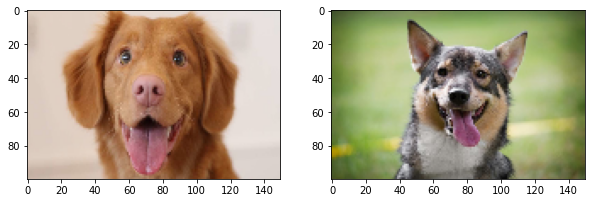

In [ ]:
import tensorflow as tf
import numpy as np
import urllib.request
from urllib.error import HTTPError
import cv2
import matplotlib.pyplot as plt

def url2img(url):
    try:        
        resp = urllib.request.urlopen(url, timeout=30)
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    except HTTPError as err:        
        if err.code == 404:
            raise Exception("Image not found")
        elif err.code == 403:
            raise Exception("Forbidden image, try with other one")
        else:
            raise

a = url2img("https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/322868_1100-1100x628.jpg")
b = url2img("https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/17140825/Swedish-Vallhund-head-portrait-outdoors.jpg")
a = cv2.resize(a,(150,100))
b = cv2.resize(b,(150,100))

fig = plt.figure(figsize=(10,10))
subplots = fig.subplots(ncols=2)
subplots[0].imshow(a)
subplots[1].imshow(b)
plt.show()

/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
<dtype: 'float32'> <dtype: 'float32'>


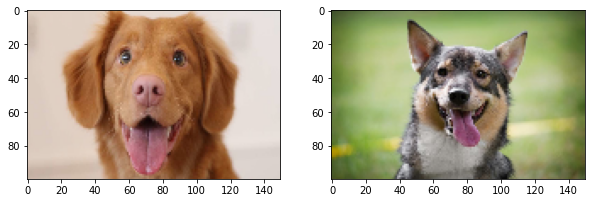

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


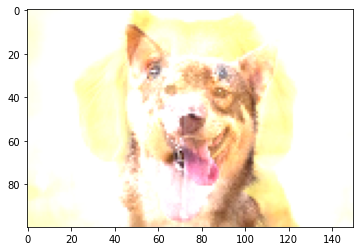

In [ ]:
image_a = tf.convert_to_tensor(a) / 255
image_b = tf.convert_to_tensor(b) / 255
print(image_a.device, image_b.device)
print(image_a.dtype, image_b.dtype)
# image_a = tf.cast(image_a, tf.float16)
# image_b = tf.cast(image_b,  tf.float16)
# plot the images
fig = plt.figure(figsize=(10,10))
subplots = fig.subplots(ncols=2)
subplots[0].imshow(image_a.numpy().astype(np.float))
subplots[1].imshow(image_b.numpy().astype(np.float))
plt.show()
with tf.device('/device:GPU:0'):
    dst = image_a + image_b    
plt.imshow(dst.numpy().astype(float))

$ \mathrm{MSE}=\frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-\tilde{y}_{i}\right)^{2} $


In [17]:
x = tf.linspace(start=0,stop=10, num=20, name="x")
y = tf.linspace(start=20,stop=40, num=20, name="y")

mse = tf.reduce_sum(tf.pow(x - y, 2)) / len(x)
print(mse)
print(mse.numpy())

tf.Tensor(634.2105263157895, shape=(), dtype=float64)
634.2105263157895


In [ ]:
z = np.arange(0,10)
zt = tf.convert_to_tensor(z)
zt[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 2, 3, 4])>